In [1]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust the configuration of plot

pd.options.mode.chained_assignment = None

In [2]:
# import the data and quick look at them

df = pd.read_csv('../input/movies/movies.csv')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#let's see if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Data types for our column 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#change the data type
# Fill missing values with a specified value of 0 
df['budget'] = df['budget'].fillna(0)

In [6]:
# Convert the 'budget' column to integer data type 
df['budget'] = df['budget'].astype(int)
df['gross '] = df['budget'].astype (int)

In [7]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,19000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,4500000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,18000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,3500000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,6000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,7000
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,58750
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,15000


In [8]:
df.isnull().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
gross         0
dtype: int64

There are several mismatches in year and year released. To fix this I have to create new column based on year released data

In [9]:
# extract year from 'released' column

df['year_fix'] = df['released'].astype('str').str.extract('(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross,year_fix
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,19000000,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,4500000,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,18000000,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,3500000,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,6000000,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,7000,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,58750,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,15000,2020


Now the data has been cleaned let's explore it!

In [10]:
#sort data based on gross 
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross,year_fix
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,237000000,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,356000000,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0,200000000,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,245000000,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,321000000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,7000,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,58750,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,15000,2020


Now let's see the correlation between budget and gross revenue

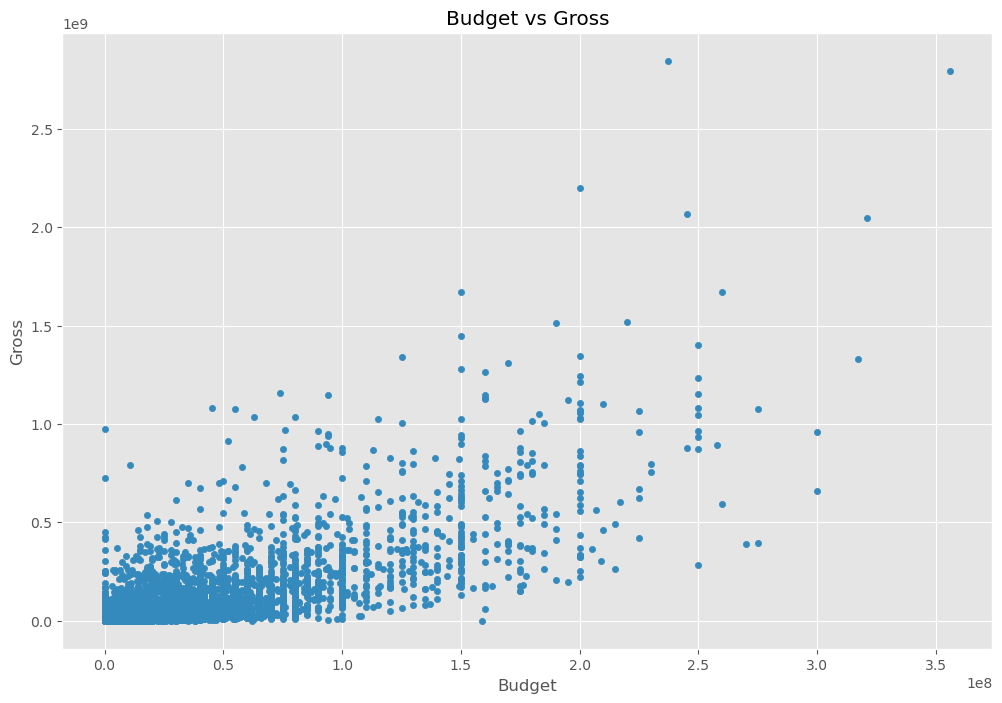

In [11]:
# Create a scatter chart of 'budget' vs 'gross'
df.plot.scatter(x='budget', y='gross')

# Set chart title and labels
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

# Show the chart
plt.show()


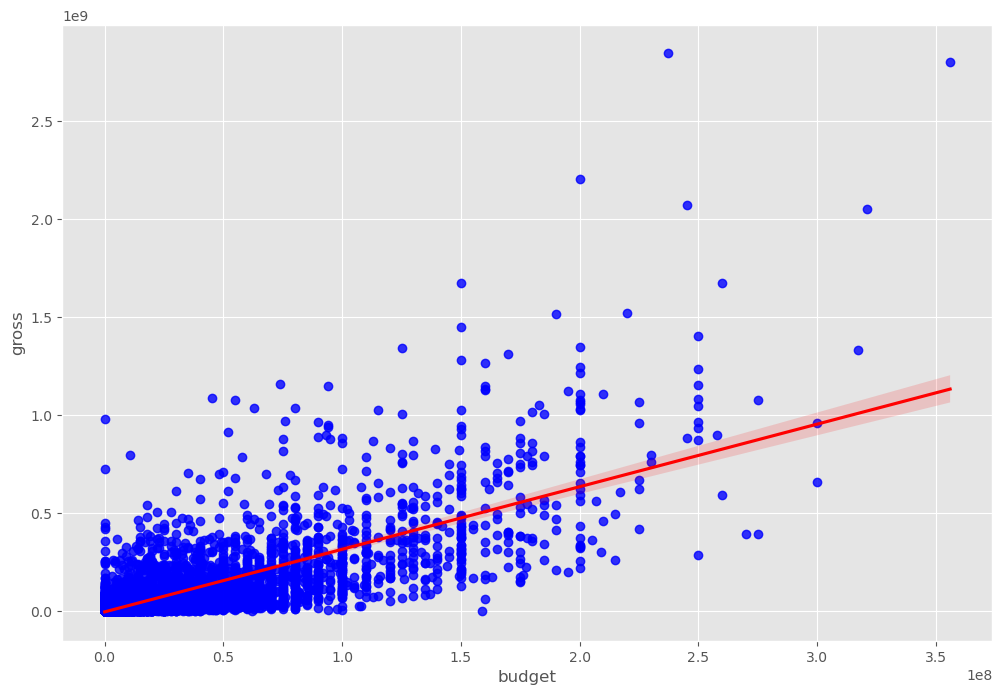

In [12]:
#plot the budget vs gross using seaborn to see the line

sns.regplot(x='budget', y = 'gross', data = df, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.show()

In [13]:
#start looking at correlation
df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,gross
year,1.000000,0.097995,0.222945,0.309212,0.257486,0.120811,0.309212
score,0.097995,1.000000,0.409182,0.055665,0.186258,0.399451,0.055665
votes,0.222945,0.409182,1.000000,0.486862,0.630757,0.309212,0.486862
budget,0.309212,0.055665,0.486862,1.000000,0.748719,0.269510,1.000000
gross,0.257486,0.186258,0.630757,0.748719,1.000000,0.245216,0.748719
runtime,0.120811,0.399451,0.309212,0.269510,0.245216,1.000000,0.269510
gross,0.309212,0.055665,0.486862,1.000000,0.748719,0.269510,1.000000


It seems that based on the scatterplot and correlation method, the movie budget is highly correlated with gross revenue

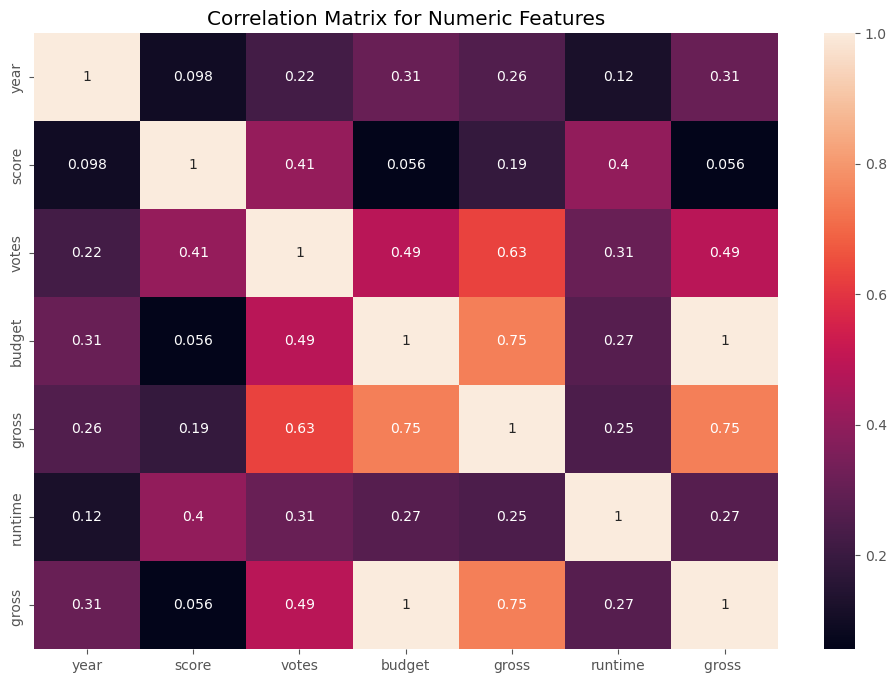

In [14]:
#let see the correlation visualized with heatmap

sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

Now we know that budget closely correlated with gross revenue of a Movie. Let's see how a company's role in this

In [15]:
# We need to numerized all non numerical values in dataframe to gain this insight

df_numerized = df.copy()


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross,year_fix
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0,19000000,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0,4500000,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0,18000000,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0,3500000,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0,6000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,NaN,-1,90.0,7000,40
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0,NaN,539,90.0,0,40
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,NaN,941,NaN,58750,40
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,NaN,-1,120.0,15000,40


In [16]:
#now see the correlations

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross,year_fix
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.005533,0.009211,0.010392,0.020548,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.107339,-0.032943,0.062145,-0.081939,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.235650,-0.071067,-0.052711,-0.334021,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.257486,-0.010431,0.120811,0.309212,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.001659,-0.010474,0.000868,0.009145,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186258,0.001030,0.399451,0.055665,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.630757,0.133204,0.309212,0.486862,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014441,0.004404,0.017624,0.004976,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.023519,0.005646,-0.003511,-0.025911,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.002717,0.012442,0.010174,-0.019952,-0.027606


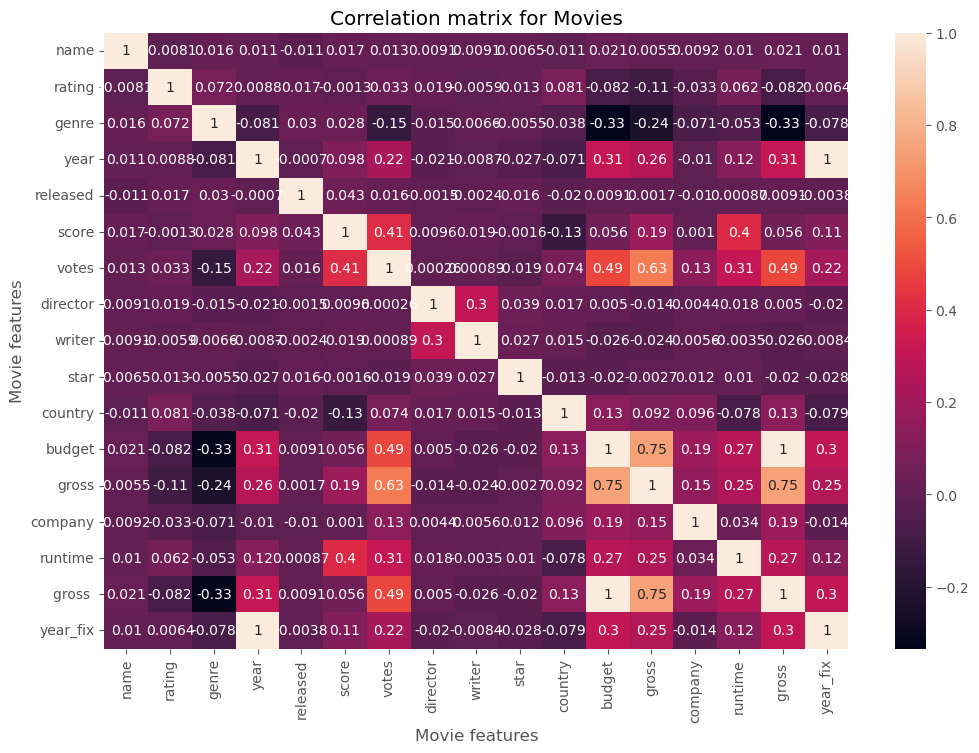

In [17]:
# find correlation in heatmap chart

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

We can see that from no correlation can be found in the company and gross revenue of a movie

By the number of votes we can see how popular a certain genre is. From this case action movies are far more popular from any other movie genres

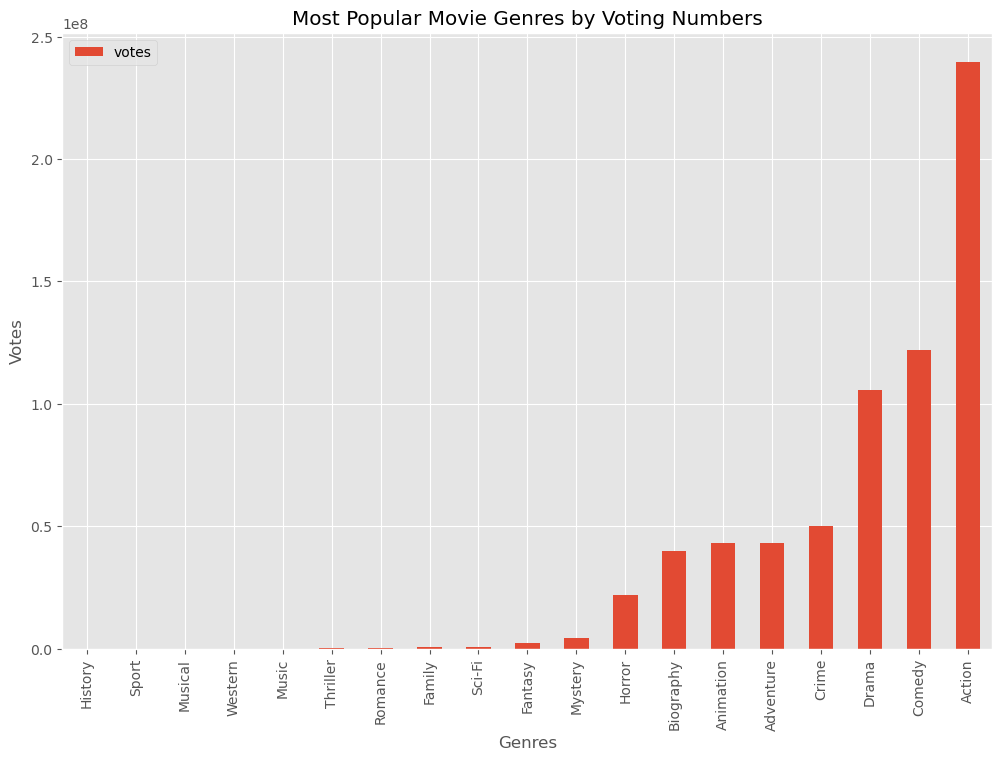

In [18]:
# find most popular genre by vote

ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by=['votes'], ascending=True)\
.plot(kind='bar', title = 'Most Popular Movie Genres by Voting Numbers')

ax.set_xlabel('Genres') #labeling the x axis
ax.set_ylabel('Votes')

plt.show()

We can also see that popularity translates well to gross revenue. If we see the graph below we can see that the most popular genre is the same with the best grossing genres.

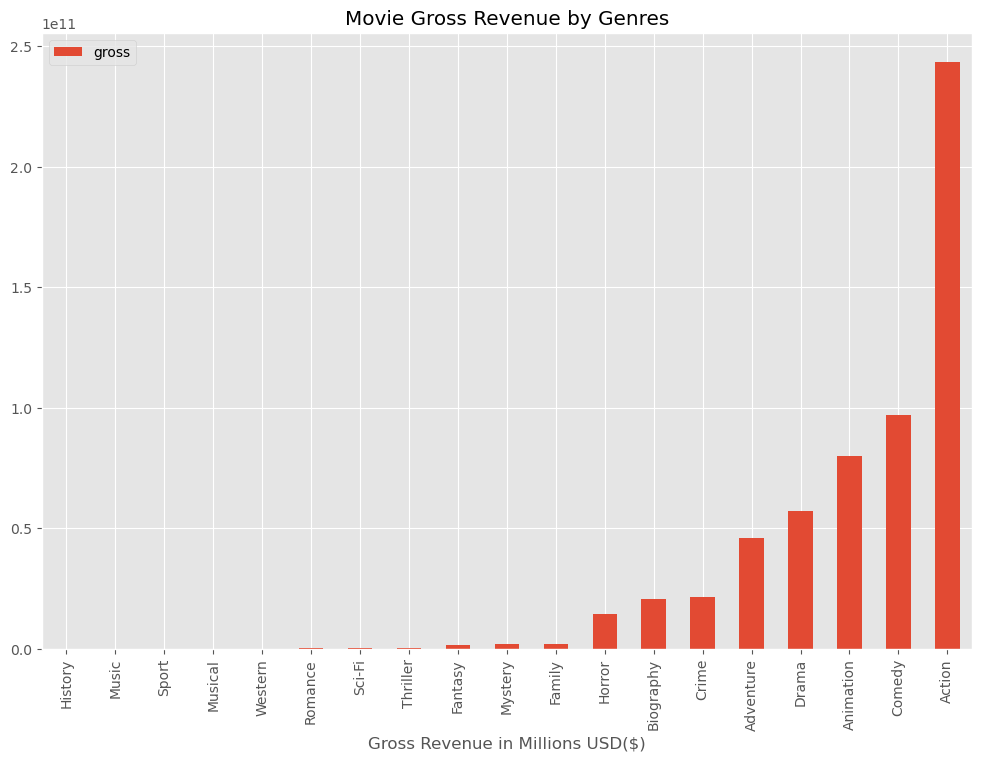

In [19]:
ax = df[['genre','gross']].groupby(['genre']).sum().sort_values(by=['gross'], ascending=True)\
.plot(kind='bar', title = 'Movie Gross Revenue by Genres')

ax.set_xlabel('Gross Revenue in Millions USD($)')
plt.show()

If we also look at the number of gross revenue, action genre is still dominating.

However, in terms of IMDB user ratings, the action genre is not the leader. The honor goes to Biography.

In [20]:
from prettytable import PrettyTable

# Group data by genre and compute the mean score
df_genre_score_mean = df[['genre','score']].groupby(['genre']).mean().sort_values(by=['score'], ascending=False)

# Create a table with two columns
table = PrettyTable()
table.field_names = ["Genre", "Average Score"]

# Iterate over the data and add rows to the table
for index, row in df_genre_score_mean.iterrows():
    table.add_row([index, round(row['score'], 2)])

# Set table properties
table.align["Genre"] = "l"  # left align the genre column
table.align["Average Score"] = "r"  # right align the score column
table.padding_width = 1  # add some padding to the cells

# Print the table
print(table)


+-----------+---------------+
| Genre     | Average Score |
+-----------+---------------+
| History   |           8.3 |
| Musical   |          8.05 |
| Music     |           7.2 |
| Biography |          7.03 |
| Animation |          6.77 |
| Drama     |          6.69 |
| Crime     |          6.67 |
| Mystery   |          6.67 |
| Romance   |          6.41 |
| Family    |          6.36 |
| Adventure |          6.29 |
| Sci-Fi    |          6.21 |
| Action    |           6.2 |
| Comedy    |          6.19 |
| Fantasy   |          6.01 |
| Thriller  |          5.91 |
| Sport     |           5.9 |
| Horror    |          5.75 |
| Western   |          5.67 |
+-----------+---------------+


So it is shown that popularity of a movie doesn't necessarily make it highly rated one

Now here we can see which actors, actresses and directors involved in high grossing movies

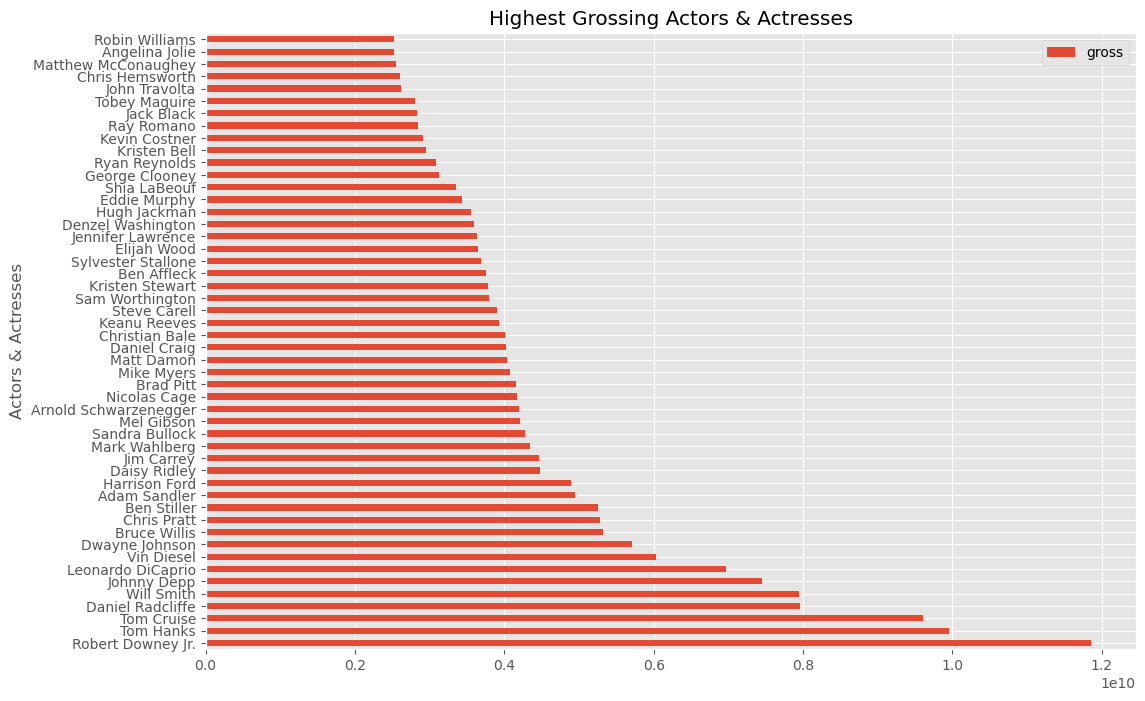

In [21]:
ax = df[['star','gross']].groupby('star').sum().sort_values(by=['gross'], ascending=False).head(50)\
.plot(kind='barh', title='Highest Grossing Actors & Actresses')
ax.set_ylabel('Actors & Actresses')
plt.show()

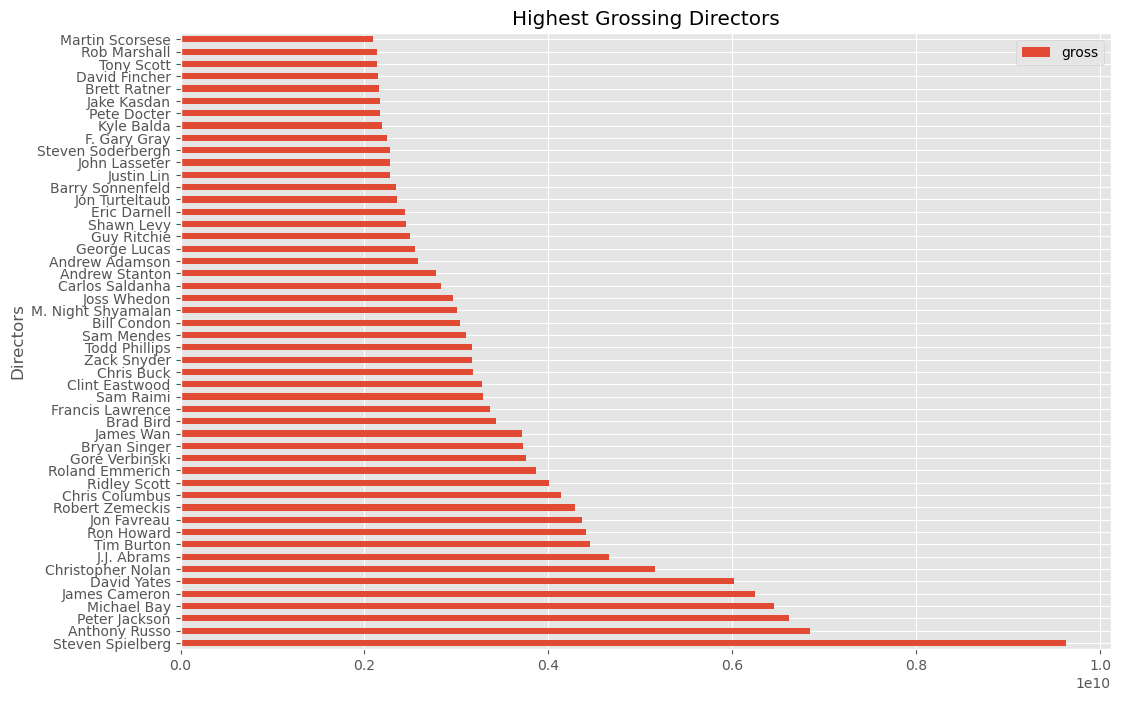

In [22]:
ax = df[['director','gross']].groupby('director')\
.sum().sort_values(by=['gross'], ascending=False).head(50).plot(kind='barh', title='Highest Grossing Directors')
ax.set_ylabel('Directors')
plt.show()

In conclusions if a movie wants have a higher chance of higher gross, the producer needs to consider all data shown above.